# House Prices - Advanced Regression Techniques

## Project Overview

This project aims to predict the final prices of residential homes based on various explanatory variables describing aspects of residential properties.  
We will be working with the well-known **Ames Housing dataset**, which contains 79 explanatory variables covering a wide range of property characteristics.

The objective is to develop a robust regression model that minimizes prediction error, measured by **Root Mean Squared Logarithmic Error (RMSLE)**.  
Throughout this notebook, we will follow a structured, professional workflow including:

- EDA (Exploratory Data Analysis)
- Feature engineering
- Data cleaning and preprocessing
- Model building and evaluation
- Final submission preparation

The final deliverable will be a predictive model and accompanying insights regarding the key drivers of housing prices.

---

## Project Goal

> Build a model to accurately predict house sale prices based on provided property characteristics, ensuring strong generalization to unseen data.

![House Prices](https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg)


# Data Loading

In this section, we will load the df_training and df_test datasets.  
We'll also create backup copies to preserve the original data throughout our exploration and modeling phases.


In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [23]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Backup copies
df_train_original = df_train.copy()
df_test_original = df_test.copy()

# Quick checks
print(f"df_train shape: {df_train.shape}")
print(f"df_test shape: {df_test.shape}")

df_train.head()


df_train shape: (1460, 81)
df_test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA (Exploratory Data Analysis)

<div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 15px;">

In this section, we conduct a basic exploration to better understand the structure and quality of the dataset:

- Overview of the data types
- Inspection of missing values
- Identification of categorical and numerical features
- Examination of basic statistics for numerical variables

These initial insights will guide the data cleaning and feature engineering strategies that follow.
</div>


In [3]:
# Quick Overview of Dataset
def check_df(dataframe, head=5):
    print("Shape:", dataframe.shape)
    print("\nTypes:\n", dataframe.dtypes)
    print("\nHead:\n", dataframe.head(head))
    print("\nMissing Values:\n", dataframe.isnull().sum())
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64']]
    print("\nQuantiles:\n", dataframe[num_cols].quantile([0, 0.05, 0.5, 0.95, 0.99, 1]).T)


# Grab Column Names by Data Types
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Gives the names of categorical, numeric and categorical but cardinal variables in the dataset.
    
    Parameters
    ----------
    dataframe: dataframe
    is the dataframe from which variable names are to be retrieved.
    cat_th: int, float
    class threshold value for numeric but categorical variables
    car_th: int, float
    class threshold value for categorical but cardinal variables
    
    Returns
    -------
    cat_cols: list
    Categorical variable list
    num_cols: list
    Numeric variable list
    cat_but_car: list
    Cardinal variable list with categorical appearance
    
    Notes
    ------
    cat_cols + num_cols + cat_but_car = total number of variables
    num_but_cat is inside cat_cols.

    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical columns: {len(cat_cols)}')
    print(f'Numerical columns: {len(num_cols)}')
    print(f'Categorical but Cardinal columns: {len(cat_but_car)}')
    return cat_cols, num_cols, cat_but_car

# Missing Values Table
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio (%)'])
    print(missing_df, end="\n\n")
    if na_name:
        return na_columns

# Categorical Summary with Optional Bar Plot
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio (%)": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(f"{col_name} Count Plot")
        plt.xticks(rotation=45)
        plt.show()

# Numerical Summary with Optional Histogram
def num_summary(dataframe, num_col, plot=False):
    quantiles = [0.05, 0.5, 0.95]
    print(dataframe[num_col].describe(quantiles).T)
    if plot:
        import matplotlib.pyplot as plt
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(f"{num_col} Histogram")
        plt.show()


Shape: (1460, 82)

Types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
HasPool            int64
Length: 82, dtype: object

Head:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2     

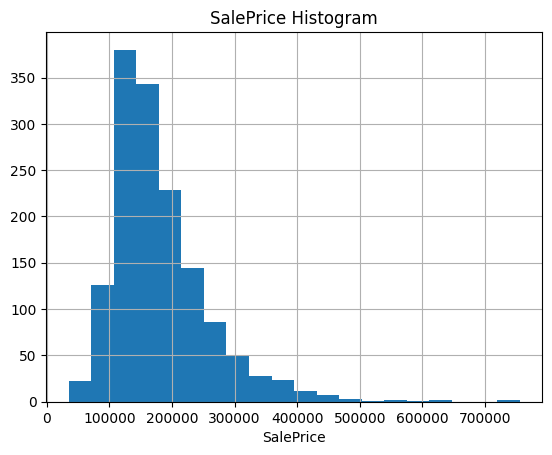

In [13]:

check_df(df_train)

# Identify column types
cat_cols, num_cols, cat_but_car = grab_col_names(df_train)

# Check missing values
missing_values_table(df_train)

# SalePrice distribution
num_summary(df_train, "SalePrice", plot=True)




### **What is the distribution of the size of the house (`GrLivArea`)?**

This helps us understand the distribution of the house size. We can check for any skewness or outliers, especially in large houses.

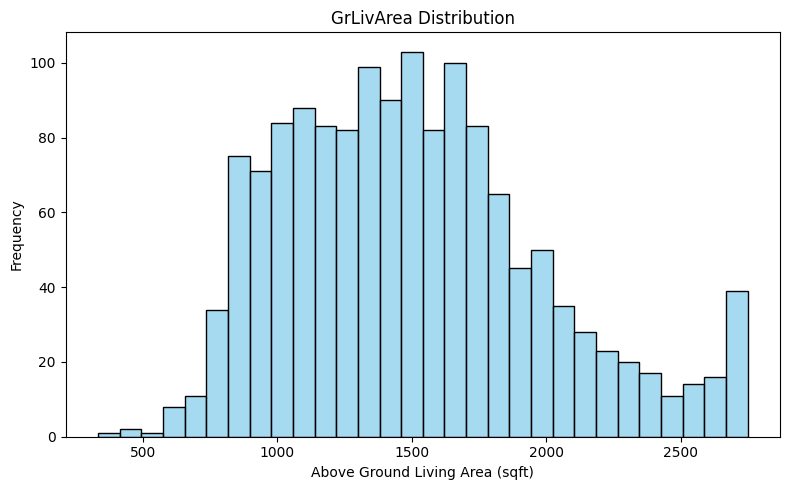

In [78]:

plt.figure(figsize=(8, 5))
sns.histplot(df_train['GrLivArea'], bins=30, kde=False, color='skyblue')
plt.title('GrLivArea Distribution')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **Does the quality of exterior finish (`ExterQual`) affect the price?**

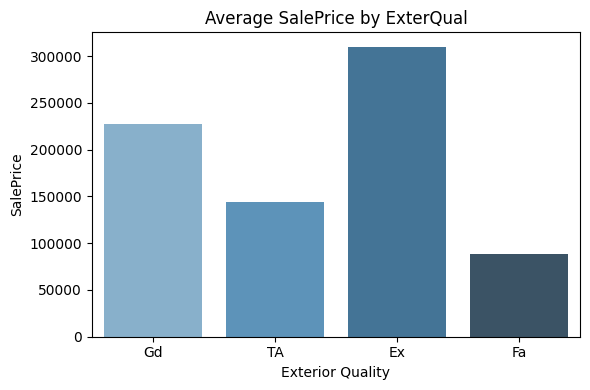

In [79]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_train, x='ExterQual', y='SalePrice', estimator=np.mean, ci=None, palette='Blues_d')
plt.title('Average SalePrice by ExterQual')
plt.xlabel('Exterior Quality')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()


#### **How does the neighborhood (`Neighborhood`) influence house prices?**


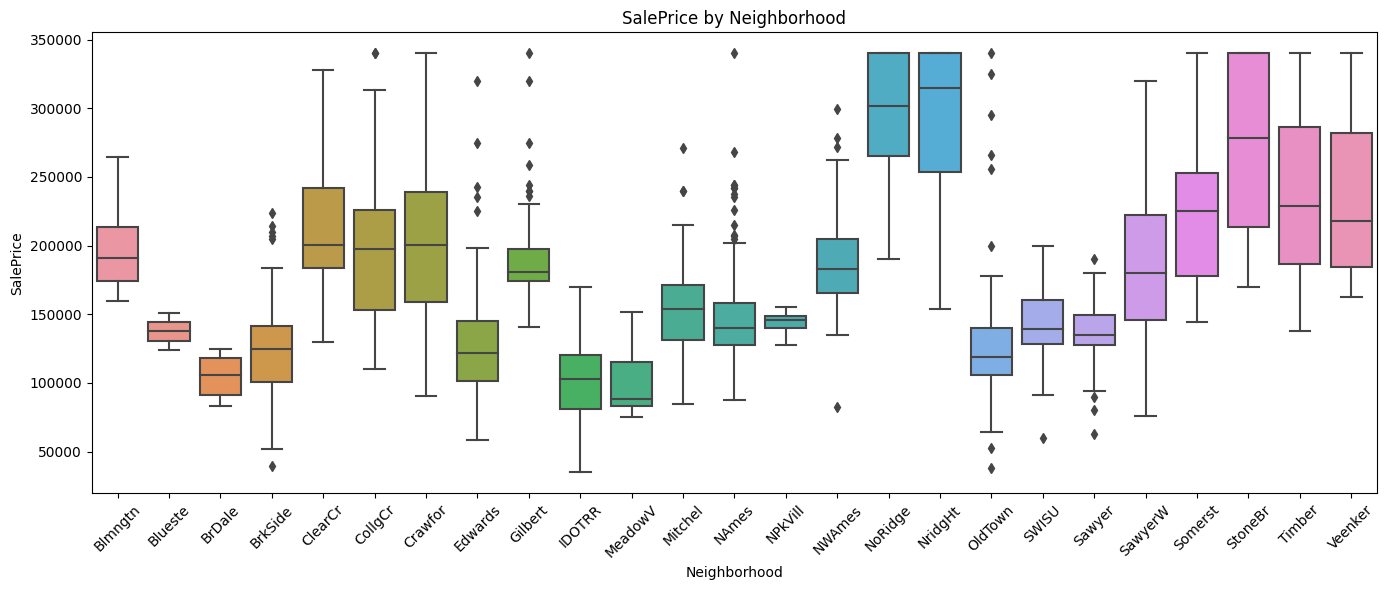

In [80]:
plt.figure(figsize=(14, 6))
order = sorted(df_train['Neighborhood'].unique())
sns.boxplot(data=df_train, x='Neighborhood', y='SalePrice', order=order)
plt.title('SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Does having a pool (`HasPool`) affect the sale price?**

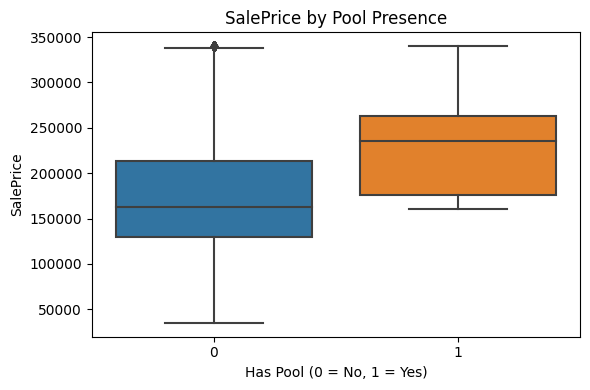

In [81]:
df_train['HasPool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_train, x='HasPool', y='SalePrice')
plt.title('SalePrice by Pool Presence')
plt.xlabel('Has Pool (0 = No, 1 = Yes)')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()


### Missing Value Detection

Before handling missing values, we first visualize which features have missing data and how significant the missingness is.

We plot the top 15 features with the highest missing value ratios.

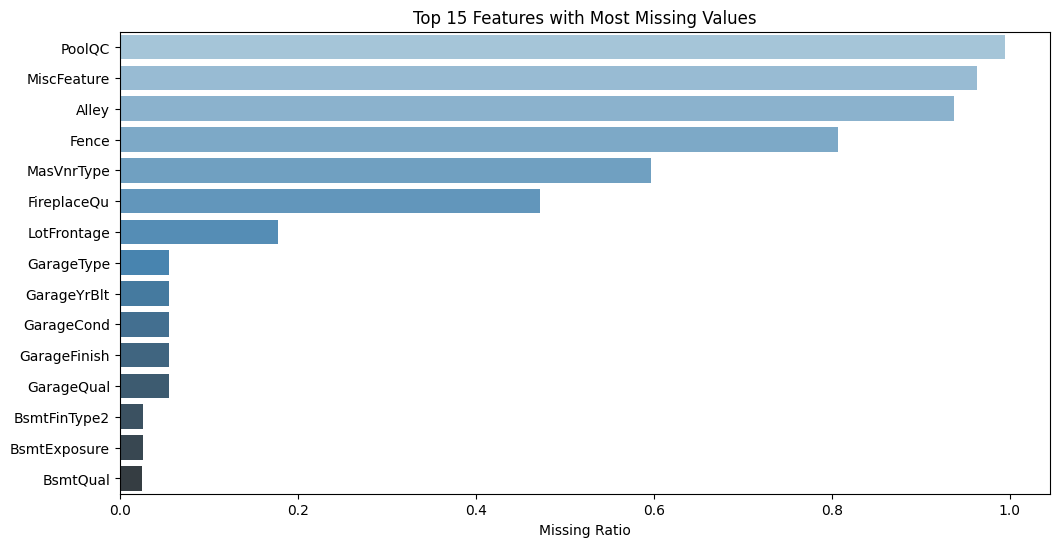

In [10]:
# Calculate missing ratios
missing_df = df_train.isnull().mean().sort_values(ascending=False)
missing_df = missing_df[missing_df > 0].head(15)  # only top 15

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.values, y=missing_df.index, palette="Blues_d")
plt.xlabel("Missing Ratio")
plt.title("Top 15 Features with Most Missing Values")
plt.show()


### Outlier Detection

Outliers can distort model df_training, particularly for regression tasks.  
Rather than removing them immediately, we first detect their presence in numerical features.

We use the **Interquartile Range (IQR) method**:

- **Q1** = 25th percentile (first quartile)
- **Q3** = 75th percentile (third quartile)
- **IQR** = Q3 - Q1
- **Lower Bound** = Q1 - 1.5 × IQR
- **Upper Bound** = Q3 + 1.5 × IQR

An observation is considered an outlier if it falls outside these bounds:

$$
\text{Lower Bound} = Q1 - 1.5 \times (Q3 - Q1)
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times (Q3 - Q1)
$$

We only **detect** outliers at this stage to inform future steps;  
no removal or imputation is performed yet.


In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    up_limit, low_limit = outlier_thresholds(dataframe, col_name)

    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].shape[0] > 10:
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].head())
    else:
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)])

    if index:
        outliers_index = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].index
        return outliers_index


In [14]:
for col in num_cols:
    print(col,check_outlier(df_train,col))

Id False
MSSubClass True
LotFrontage True
LotArea True
OverallQual True
YearBuilt True
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt False
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False
SalePrice True


## <a name="target-variable-analysis"></a>Target Variable Analysis: SalePrice

The target variable in this competition is `SalePrice`, which represents the final sale price of a house.

Understanding its distribution is crucial because:
- Regression models perform better when the target is normally distributed.
- The evaluation metric (RMSLE) penalizes underestimation more heavily than overestimation.
- Log-transforming a skewed target often improves model performance.

In this step, we will:
- Visualize the distribution of `SalePrice`
- Compute its skewness
- Apply a log-transformation to reduce skewness

The log-transformation is applied as follows:

$$
SalePrice_{\text{log}} = \log(SalePrice)
$$

Where:
- SalePrice SalePrice  is the original target variable.
- \( SalePrice_{\text{log}} \) is the log-transformed target variable.
  
By applying the log function, we can often improve the performance of regression models by reducing the skewness and making the distribution more normal.


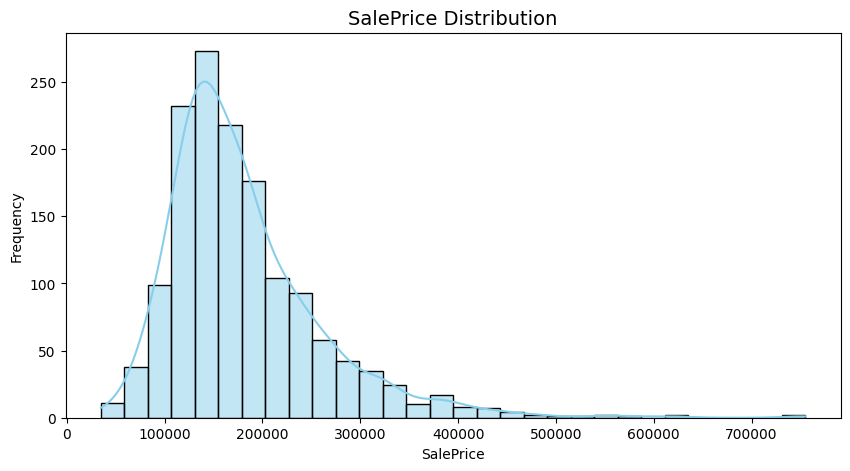

Skewness before log transformation: 1.8829


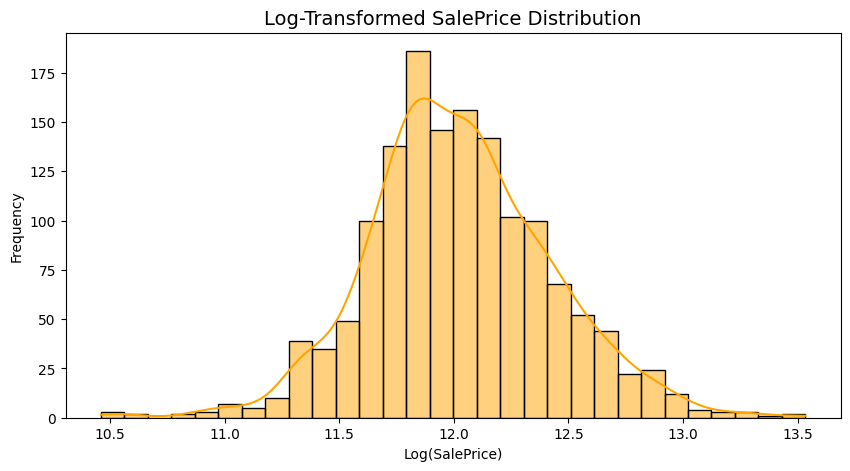

Skewness after log transformation: 0.1213


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize original distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train["SalePrice"], kde=True, bins=30, color="skyblue")
plt.title("SalePrice Distribution", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Check skewness
original_skew = df_train["SalePrice"].skew()
print(f"Skewness before log transformation: {original_skew:.4f}")

# Apply log1p transformation
df_train["SalePrice_log"] = np.log1p(df_train["SalePrice"])

# Visualize transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train["SalePrice_log"], kde=True, bins=30, color="orange")
plt.title("Log-Transformed SalePrice Distribution", fontsize=14)
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

# Check new skewness
log_skew = df_train["SalePrice_log"].skew()
print(f"Skewness after log transformation: {log_skew:.4f}")


## <a name="feature-analysis"></a>Numerical Feature Analysis (Correlation with SalePrice)

Now that we've prepared a normalized version of the target variable (`SalePrice_log`),  
we will explore how other numerical features relate to it.

We will:
- Compute the correlation matrix
- Identify top correlated variables with the target
- Visualize them using a heatmap

These insights will help us focus on the most relevant features during modeling.



Top 10 correlated features with SalePrice_log:

SalePrice_log   1.000
SalePrice       0.948
OverallQual     0.817
GrLivArea       0.701
GarageArea      0.651
TotalBsmtSF     0.612
1stFlrSF        0.597
YearBuilt       0.587
YearRemodAdd    0.566
GarageYrBlt     0.541
TotRmsAbvGrd    0.534
Name: SalePrice_log, dtype: float64


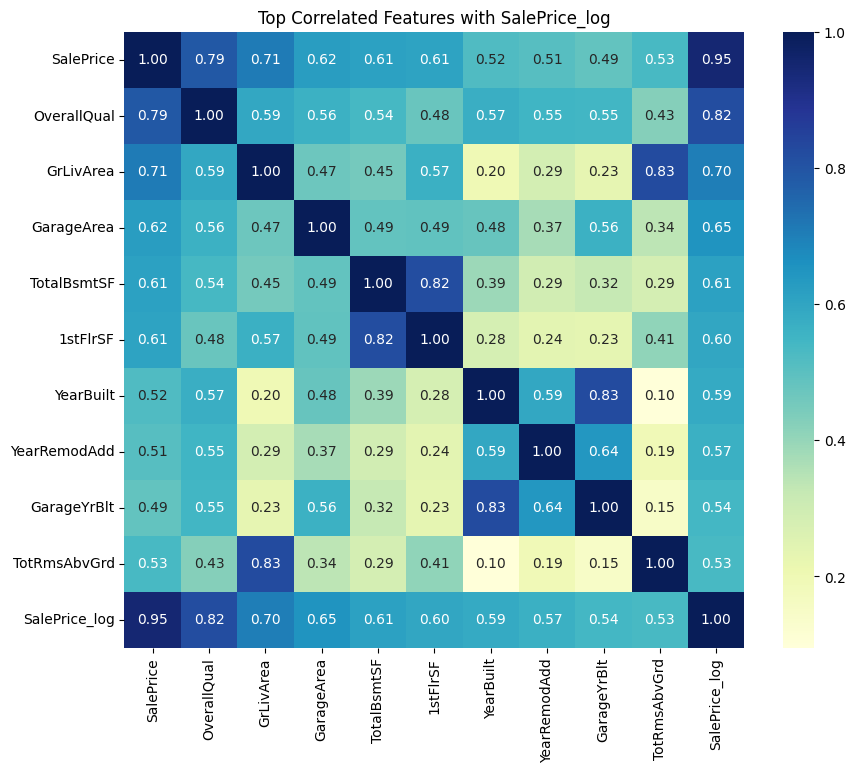

In [16]:
numeric_df = df_train[num_cols + ["SalePrice_log"]]  # include the target

#Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation with SalePrice_log
corr_target = corr_matrix["SalePrice_log"].sort_values(ascending=False)
print("Top 10 correlated features with SalePrice_log:\n")
print(corr_target.head(11))  # include SalePrice_log itself

#Visualize top correlated features
top_corr_features = corr_target.drop("SalePrice_log").head(10).index.tolist()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[top_corr_features + ["SalePrice_log"]].corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Top Correlated Features with SalePrice_log")
plt.show()


### Removing Highly Correlated Numerical Features

To reduce multicollinearity, we identify and remove numerical features that are strongly correlated with each other (correlation > 0.90).  
Keeping both in the model can lead to unstable coefficients and redundant information.

We use a helper function to:
- Compute pairwise correlations
- Visualize the matrix
- Drop one of each strongly correlated pair


No highly correlated features found.


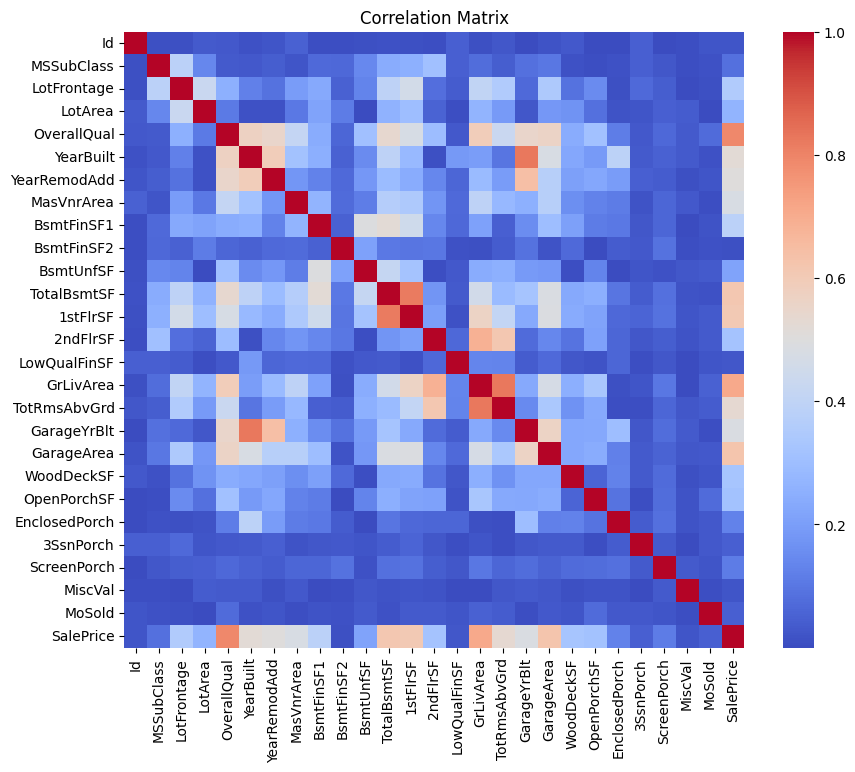

In [17]:

def high_correlated_cols(dataframe, plot=False, corr_th=0.90, verbose=True):
    corr_matrix = dataframe.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    drop_list = []
    dropped_pairs = []

    for col in upper_triangle.columns:
        high_corr = upper_triangle[col][upper_triangle[col] > corr_th]
        if not high_corr.empty:
            drop_list.append(col)
            if verbose:
                for idx in high_corr.index:
                    dropped_pairs.append((col, idx, upper_triangle[col][idx]))

    if verbose and dropped_pairs:
        print(f"Highly correlated pairs (>{corr_th}):\n")
        for col1, col2, corr in dropped_pairs:
            print(f" - {col1} ↔ {col2}: {corr:.2f}")
    elif verbose:
        print("No highly correlated features found.")

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
        plt.title("Correlation Matrix")
        plt.show()

    return drop_list

# Apply to numerical features
high_corr_cols = high_correlated_cols(df_train[num_cols], plot=True, corr_th=0.90)

# Drop them from df_train/df_test
df_train.drop(columns=high_corr_cols, inplace=True)
df_test.drop(columns=high_corr_cols, inplace=True)

# Update num_cols list
num_cols = [col for col in num_cols if col not in high_corr_cols]


## <a name="categorical-feature-analysis"></a>Categorical Feature Analysis

In this section, we explore the categorical features in our dataset to better understand their distribution. We use **value counts** and **ratios** to analyze how frequently each category appears and how they are distributed within each feature.

In this analysis, we will:

1. Calculate the **value counts** for each categorical feature, which shows how often each category appears.
2. Compute the **ratio** of each category’s occurrence, which provides insight into the proportion of each category within the feature.

These steps help us understand the **distribution** of categorical features, allowing us to identify which categories may have a stronger representation in the dataset. This exploration is an essential step before deciding which features to include in the modeling process.


In [18]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

In [19]:

for col in cat_cols:
    cat_summary(df_train, col)


          MSZoning  Ratio
MSZoning                 
RL            1151 78.836
RM             218 14.932
FV              65  4.452
RH              16  1.096
C (all)         10  0.685
##########################################
        Street  Ratio
Street               
Pave      1454 99.589
Grvl         6  0.411
##########################################
       Alley  Ratio
Alley              
Grvl      50  3.425
Pave      41  2.808
##########################################
          LotShape  Ratio
LotShape                 
Reg            925 63.356
IR1            484 33.151
IR2             41  2.808
IR3             10  0.685
##########################################
             LandContour  Ratio
LandContour                    
Lvl                 1311 89.795
Bnk                   63  4.315
HLS                   50  3.425
Low                   36  2.466
##########################################
           Utilities  Ratio
Utilities                  
AllPub          1459 99.932
NoS

#### Groupby `OverallQual` and `YearBuilt` by Decade

Raw year‐by‐year results can be overwhelming.  
To get clearer insights, we:

1. **Bin `YearBuilt` into decades** (e.g. 1920s, 1930s, …).  
2. **Compute the mean `SalePrice`** for each combination of decade and overall quality.  
3. **Pivot** into a matrix (decades × quality) and plot a heatmap.  

This reveals how the interplay between house quality and construction era drives prices.

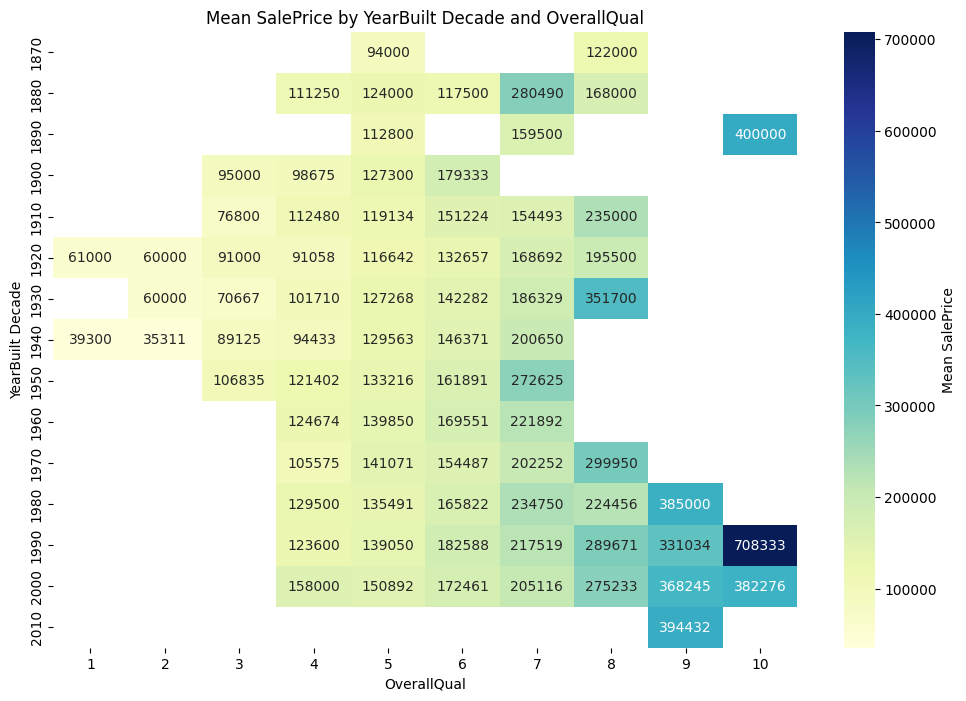

In [20]:
df_train['YearBuilt_decade'] = (df_train['YearBuilt'] // 10) * 10

decade_quality = (
    df_train
      .groupby(['YearBuilt_decade','OverallQual'])['SalePrice']
      .mean()
      .reset_index()
)

# 3. Pivot to wide format
pivot = decade_quality.pivot(index='YearBuilt_decade',
                              columns='OverallQual',
                              values='SalePrice')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label':'Mean SalePrice'})
plt.title('Mean SalePrice by YearBuilt Decade and OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('YearBuilt Decade')
plt.show()

#### Mean SalePrice by GarageCars and GarageArea Category

Continuous `GarageArea` can be noisy, so we **bin** it into categories and analyze together with `GarageCars`.  
This heatmap shows how both the number of garage spaces and the size category of the garage influence price.

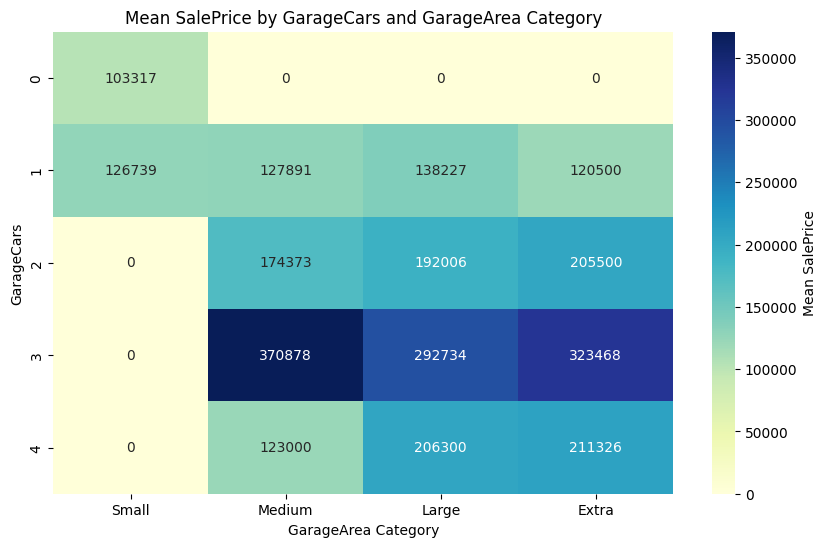

In [21]:
bins = [0, 200, 500, 800, df_train['GarageArea'].max()]
labels = ['Small','Medium','Large','Extra']
df_train['GarageArea_bin'] = pd.cut(df_train['GarageArea'], bins=bins, labels=labels, include_lowest=True)

garage_pivot = (
    df_train
    .groupby(['GarageCars','GarageArea_bin'])['SalePrice']
    .mean()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    garage_pivot,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Mean SalePrice'}
)
plt.title('Mean SalePrice by GarageCars and GarageArea Category')
plt.xlabel('GarageArea Category')
plt.ylabel('GarageCars')
plt.show()


# <a name="missing-outlier-treatment"></a>Data Preprocessing and Cleaning

Before modeling, we need to **clean** the data by addressing both missing values and extreme outliers. In this step we will:

1. **Drop** features with very high missingness (> 80%).
2. **Flag** and **impute** missing values:
   - Create a binary “_NA_FLAG” for any column with missing values.
   - Impute categorical features with `"Missing"`.
   - Impute numerical features with their **median**.
3. **Detect and remove** outliers in key numerical predictors using the IQR method:
   - Compute Q1, Q3 and IQR.
   - Define lower/upper bounds as \(Q1 - 1.5 \times IQR\) and \(Q3 + 1.5 \times IQR\).
   - Remove observations outside those bounds for the selected columns.


In [22]:
# Find columns with more than 80% missing values
missing_ratio = df_train.isnull().mean()
features_to_drop = missing_ratio[missing_ratio > 0.80].index.tolist()

print("Dropping features due to >80% missing values:")
print(features_to_drop)

# Drop from both train and test
df_train.drop(columns=features_to_drop, inplace=True)
df_test.drop(columns=features_to_drop, inplace=True)


Dropping features due to >80% missing values:
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [30]:
def fill_missing_values(df):
    df_filled = df.copy()
    
    # Fill categorical with mode (most common)
    cat_cols = df_filled.select_dtypes(include='object').columns
    for col in cat_cols:
        df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])
    
    # Fill numerical with median
    num_cols = df_filled.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        df_filled[col] = df_filled[col].fillna(df_filled[col].median())

    return df_filled

# Apply to both
df_train = fill_missing_values(df_train)
df_test = fill_missing_values(df_test)




In [32]:

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [34]:
for col in num_cols:
    replace_with_thresholds(df_train,col)


In [36]:
for col in num_cols:
    print(col,check_outlier(df_train,col))


Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False
MoSold False
SalePrice False


In [37]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## <a name="feature-engineering"></a>Feature Engineering

In this step, we create new features that capture combined size, amenities, and the effect of age/remodel on price:

### Total Square Footage (`TotalSF`)
Total livable area of the house, summing basement, first floor, and second floor square footage. This is a strong predictor of sale price.

$$
\text{TotalSF}
= \text{TotalBsmtSF} + \text{1stFlrSF} + \text{2ndFlrSF}
$$

---

### Total Bathrooms (`TotalBath`)
Combined count of all bathrooms, weighting half baths as 0.5. Helps capture a clearer signal of bathroom availability.

$$
\text{TotalBath}
= \text{FullBath} + \text{BsmtFullBath} + 0.5 \times (\text{HalfBath} + \text{BsmtHalfBath})
$$

---

### House Age (`HouseAge`)
Number of years from construction until the sale date. Older homes may sell for less unless renovated.

$$
\text{HouseAge}
= \text{YrSold} - \text{YearBuilt}
$$

---

### Years Since Remodel (`RemodAge`) 
How recently the house was remodeled. Homes with recent renovations often command higher prices.

$$
\text{RemodAge}
= \text{YrSold} - \text{YearRemodAdd}
$$

---

### Garage Presence (`HasGarage`)
Binary indicator showing whether the property has a garage.

$$
\text{HasGarage}
=
\begin{cases}
1 & \text{if } \text{GarageArea} > 0 \\\\
0 & \text{otherwise}
\end{cases}
$$

---

### Basement Presence (`HasBasement`)
Indicates if the property has a basement — a common value booster in many regions.

$$
\text{HasBasement}
=
\begin{cases}
1 & \text{if } \text{TotalBsmtSF} > 0 \\\\
0 & \text{otherwise}
\end{cases}
$$



These features help improve the model's understanding of each house's value drivers, contributing to better SalePrice (in \$)
predictions.






In [38]:
# Make a copy to avoid side effects
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()

# 1. Total square footage
df_train_fe["TotalSF"] = df_train_fe["TotalBsmtSF"] + df_train_fe["1stFlrSF"] + df_train_fe["2ndFlrSF"]
df_test_fe["TotalSF"] = df_test_fe["TotalBsmtSF"] + df_test_fe["1stFlrSF"] + df_test_fe["2ndFlrSF"]

# 2. Age of house at time of sale
df_train_fe["HouseAge"] = df_train_fe["YrSold"] - df_train_fe["YearBuilt"]
df_test_fe["HouseAge"] = df_test_fe["YrSold"] - df_test_fe["YearBuilt"]

# 3. Time since remodel
df_train_fe["RemodAge"] = df_train_fe["YrSold"] - df_train_fe["YearRemodAdd"]
df_test_fe["RemodAge"] = df_test_fe["YrSold"] - df_test_fe["YearRemodAdd"]

# 4. Has garage/basement/pool indicators
df_train_fe["HasGarage"] = (df_train_fe["GarageArea"] > 0).astype(int)
df_test_fe["HasGarage"] = (df_test_fe["GarageArea"] > 0).astype(int)

df_train_fe["HasBasement"] = (df_train_fe["TotalBsmtSF"] > 0).astype(int)
df_test_fe["HasBasement"] = (df_test_fe["TotalBsmtSF"] > 0).astype(int)


### Binning Continuous Variables into Categories

Creating bins from continuous features can help models capture non-linear relationships and group similar observations together. Below, we define a few useful binned features:

---

#### 1. **Binned House Age (`HouseAgeBin`)**  
Bucketize the age of the house into life stages:

- 0–10 years → New
- 11–30 years → Recent
- 31–60 years → Mid-Age
- 60+ years → Old

\[
\text{HouseAgeBin} =
\begin{cases}
\text{"New"} & \text{if } \text{HouseAge} \leq 10 \\\\
\text{"Recent"} & \text{if } 10 < \text{HouseAge} \leq 30 \\\\
\text{"Mid-Age"} & \text{if } 30 < \text{HouseAge} \leq 60 \\\\
\text{"Old"} & \text{if } \text{HouseAge} > 60
\end{cases}
\]

---

#### 2. **GrLivArea Category (`GrLivAreaBin`)**  
Discretize gross living area into bins based on distribution:

- < 1000 → Small
- 1000–1600 → Medium
- 1600–2500 → Large
- > 2500 → Luxury

\[
\text{GrLivAreaBin} =
\begin{cases}
\text{"Small"} & \text{if } \text{GrLivArea} < 1000 \\\\
\text{"Medium"} & \text{if } 1000 \leq \text{GrLivArea} < 1600 \\\\
\text{"Large"} & \text{if } 1600 \leq \text{GrLivArea} < 2500 \\\\
\text{"Luxury"} & \text{if } \text{GrLivArea} \geq 2500
\end{cases}
\]

---

#### 3. **TotalSF Category (`TotalSFBin`)**  
Similarly, total square footage can be grouped:

\[
\text{TotalSFBin} =
\begin{cases}
\text{"Compact"} & \text{if } \text{TotalSF} < 1200 \\\\
\text{"Standard"} & \text{if } 1200 \leq \text{TotalSF} < 2000 \\\\
\text{"Spacious"} & \text{if } 2000 \leq \text{TotalSF} < 3000 \\\\
\text{"Estate"} & \text{if } \text{TotalSF} \geq 3000
\end{cases}
\]

---

These binned features can be treated as **categorical variables** during encoding, helping the model differentiate between meaningful groups of properties.


In [39]:
# 1. House Age Bins
df_train_fe["HouseAgeBin"] = pd.cut(
    df_train_fe["HouseAge"],
    bins=[-1, 10, 30, 60, float("inf")],
    labels=["New", "Recent", "Mid-Age", "Old"]
)

df_test_fe["HouseAgeBin"] = pd.cut(
    df_test_fe["HouseAge"],
    bins=[-1, 10, 30, 60, float("inf")],
    labels=["New", "Recent", "Mid-Age", "Old"]
)

# 2. GrLivArea Bins
df_train_fe["GrLivAreaBin"] = pd.cut(
    df_train_fe["GrLivArea"],
    bins=[-1, 1000, 1600, 2500, float("inf")],
    labels=["Small", "Medium", "Large", "Luxury"]
)

df_test_fe["GrLivAreaBin"] = pd.cut(
    df_test_fe["GrLivArea"],
    bins=[-1, 1000, 1600, 2500, float("inf")],
    labels=["Small", "Medium", "Large", "Luxury"]
)

# 3. TotalSF Bins
df_train_fe["TotalSFBin"] = pd.cut(
    df_train_fe["TotalSF"],
    bins=[-1, 1200, 2000, 3000, float("inf")],
    labels=["Compact", "Standard", "Spacious", "Estate"]
)

df_test_fe["TotalSFBin"] = pd.cut(
    df_test_fe["TotalSF"],
    bins=[-1, 1200, 2000, 3000, float("inf")],
    labels=["Compact", "Standard", "Spacious", "Estate"]
)


## <a name="categorical-encoding-scaling"></a>Categorical Encoding & Scaling

In this step we prepare our features for modeling by:

1. **Grouping rare categories** (<1% frequency) into a single `"Rare"` level.  
2. **One-Hot Encoding** all categorical (and binned) features to numeric binaries.  
3. **Scaling** our numeric features so they’re on a common scale.

---


### One-Hot Encoding

To convert each categorical feature \(X\) with \(k\) distinct levels \(\{\,\ell_1,\dots,\ell_k\}\) into numeric form, we create \(k-1\) binary (0/1) indicator variables.  For each level \(\ell_j\), we define

$$
D_{\ell_j}(X) \;=\;
\begin{cases}
1, & \text{if } X = \ell_j,\\
0, & \text{otherwise},
\end{cases}
\quad j=1,\dots,k-1.
$$

By dropping one dummy (the “first” level) we avoid perfect multicollinearity, since

$$
\sum_{j=1}^k D_{\ell_j}(X) \;=\; 1.
$$

By applying one‐hot encoding to each categorical or binned feature \(X\) with \(k\) levels \(\{\ell_{1}, \dots, \ell_{k}\}\), we create \(k-1\) binary indicators:

$$
D_{\ell_{j}}(X) =
\begin{cases}
1, & \text{if } X = \ell_{j},\\
0, & \text{otherwise},
\end{cases}
\quad j = 1, \dots, k-1.
$$

These dummy variables are mutually exclusive (at most one can be 1 for any observation) and avoid implying any ordering among categories, making them directly compatible with most machine‐learning algorithms.


In [40]:
# Combine for consistent encoding
df_train_fe["is_train"] = 1
df_test_fe["is_train"] = 0
combined = pd.concat([df_train_fe, df_test_fe], axis=0)

# Identify categorical columns (including your new bins)
cat_cols = combined.select_dtypes(include=["object", "category"]).columns.tolist()

# One-hot encode
combined_encoded = pd.get_dummies(combined, columns=cat_cols, drop_first=True)

# Split back
df_train_encoded = combined_encoded[combined_encoded["is_train"] == 1].drop("is_train", axis=1)
df_test_encoded = combined_encoded[combined_encoded["is_train"] == 0].drop(["is_train", "SalePrice"], axis=1)


### Scaling Numeric Features

We standardize each numeric feature \(X\) by subtracting its mean and dividing by its standard deviation:

$$
X_{\text{scaled}}
= \frac{X - \mu_X}{\sigma_X}
$$

where
$$
\mu_X \;=\;\frac{1}{n}\sum_{i=1}^n X_i,
\qquad
\sigma_X \;=\;\sqrt{\frac{1}{n}\sum_{i=1}^n\bigl(X_i - \mu_X\bigr)^2}
$$

This transformation ensures that each feature has
$$
\mathbb{E}\bigl[X_{\mathrm{scaled}}\bigr] = 0,
\qquad
\mathrm{Var}\bigl(X_{\mathrm{scaled}}\bigr) = 1,
$$

helping gradient-based and distance-based algorithms converge more reliably and treat all features on a common scale.  


In [56]:
X = df_train_encoded.drop(["SalePrice", "Id"], axis=1)
y = np.log1p(df_train_encoded["SalePrice"])  # log-transform target
test_ids = df_test_encoded["Id"]
X_test_final = df_test_encoded.drop("Id", axis=1)


In [57]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)


# Baseline Model: Linear Regression

Linear regression models the relationship between a set of predictors  
\( X = [X_1, X_2, \dots, X_p] \)  
and a continuous target \( y \) using a linear function:

$$
\hat{y}
= \beta_0 + \sum_{j=1}^{p} \beta_j X_j
$$

---

### Parameter Estimation (Ordinary Least Squares)

The model estimates the coefficients \( \{\beta_0, \beta_1, \dots, \beta_p\} \) by minimizing the **Residual Sum of Squares (RSS)**:

$$
\min_{\beta_0, \dots, \beta_p}
\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j X_{ij} \right)^2
$$

While this method is unbiased under ideal assumptions, it becomes unstable in the presence of multicollinearity or high-dimensional data.

---

### Prediction on New Data

Once fitted, the model makes predictions for new input \( X^{(\text{new})} \) as:

$$
\hat{y}^{(\text{new})}
= \beta_0 + \sum_{j=1}^{p} \beta_j X_j^{(\text{new})}
$$

---

### Evaluation Metric: Root Mean Squared Logarithmic Error (RMSLE)

To evaluate model performance, we use **Root Mean Squared Logarithmic Error (RMSLE)**, which penalizes relative errors and is less sensitive to large outliers:

$$
\mathrm{RMSLE}(y, \hat{y}) = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2 }
$$

This metric is particularly appropriate for regression tasks like house price prediction, where targets span several orders of magnitude and relative error matters more than absolute error.

---

### Model Performance and Motivation for Transition

Although linear regression serves as a common baseline, it produced extremely large RMSE values (on the order of \( 10^{10} \)) in cross-validation. This instability likely stemmed from:

- Multicollinearity among predictors,
- Lack of regularization, and
- Sensitivity to skewed distributions in the target variable.

To improve generalization and robustness, we transitioned to **Ridge Regression** with log-transformed targets, which brought the mean log-RMSE down to approximately **0.133**.

Following that, we trained a regularized tree-based model using **XGBoost**. After a grid search across multiple hyperparameter configurations, the XGBoost model achieved a **cross-validated RMSLE of approximately 0.122**, indicating superior performance and better handling of non-linear relationships in the data.


## Cross Validation

Cross-validation is a model validation technique used to evaluate how well a machine learning model will perform on unseen data.

Instead of training and testing on a single split of the dataset, cross-validation splits the training data into multiple parts (called folds) and rotates through them to ensure that every data point is used for both training and validation.
Imagine you’ve baked a large pie (your dataset), and you want to judge how good it is (model performance). But you can't eat the whole thing at once!

So, you:

* Cut it into 5 equal slices (5-fold cross-validation).
* Taste 1 slice (validation set) and leave the rest untouched (training set).
* Repeat the process until you’ve tasted each slice once, using the others to train your pie-baking skills.


By the end, you've tasted every part of the pie and have a solid idea of how the whole pie tastes — not just one piece. 



In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

lr = LinearRegression()

cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring=rmse_scorer)

cv_rmse_scores = -cv_scores
mean_rmse = np.mean(cv_rmse_scores)

# Print results
print("Cross-Validation RMSEs:", cv_rmse_scores)
print(f"Mean CV RMSE: {mean_rmse:.4f}")


Cross-Validation RMSEs: [1.45778415e+10 4.26153368e+10 3.95272446e+10 7.83446646e+09
 3.24408866e+10]
Mean CV RMSE: 27399155193.0056


In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np

# Custom RMSLE scorer (for log-transformed target, use RMSE)
def rmsle_score(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

# Initialize XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Run grid search
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=rmsle_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on scaled training data (with log1p target)
grid_xgb.fit(X_scaled, y)

# Best model and score
print("Best Params:", grid_xgb.best_params_)
print("Best RMSLE (CV):", -grid_xgb.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best RMSLE (CV): 0.12222326187299368


In [75]:
# Predict on test set
best_xgb_model = grid_xgb.best_estimator_
y_test_log_preds = best_xgb_model.predict(X_test_scaled)
y_test_preds = np.expm1(y_test_log_preds)  # inverse log

# Save submission
submission = pd.DataFrame({
    "Id": test_ids.astype(int),
    "SalePrice": y_test_preds
})
submission.to_csv("/kaggle/working/submission.csv", index=False)



### XGBoost Feature Importance Analysis

The bar chart above displays the top 15 most important features identified by the final XGBoost model, based on their contribution to reducing error during training.

- **ExterQual_TA** (Exterior Quality = Typical/Average) emerged as the most influential feature, indicating that average exterior material quality had strong predictive power for house price in this dataset.
- **TotalSFBin_Estate**, a custom feature bin representing very large estate-like homes, was also highly important, confirming the strong influence of overall square footage on price.
- **OverallQual**, which rates the overall material and finish of the house, ranks third — consistent with real estate domain knowledge.
- **TotalSF** (total square footage including basement) further supports the trend that home size is a primary driver of price.
- Features like **GarageFinish_Unf**, **KitchenQual_TA**, and **GarageCars** reflect interior quality and utility value, reinforcing the model’s reliance on both structural and finish-related variables.
- Categorical indicators such as **MSZoning_RM**, **CentralAir_Y**, and **PavedDrive_Y** show that zoning and basic amenities still have meaningful, albeit smaller, effects.
- Less intuitive features like **Neighborhood_OldTown** and **KitchenAbvGr** appeared, likely due to localized pricing patterns or interactions captured during training.

These importance scores are derived from XGBoost’s internal gain metric, which reflects how frequently a feature is used for splitting and how much it improves model accuracy when it does.


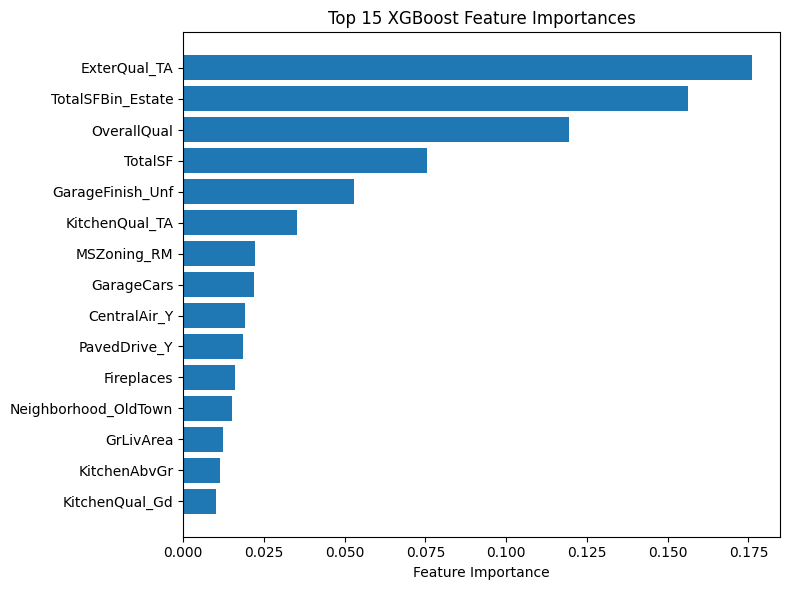

In [76]:
import matplotlib.pyplot as plt

importances = best_xgb_model.feature_importances_
features = X.columns

# Top N important features
top_idx = np.argsort(importances)[-15:]
plt.figure(figsize=(8, 6))
plt.barh(features[top_idx], importances[top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 15 XGBoost Feature Importances")
plt.tight_layout()
plt.show()
